In [ ]:
!unzip "/content/drive/MyDrive/Nifty50.zip" -d "/content/drive/MyDrive/Nifty50"

Archive:  /content/drive/MyDrive/Nifty50.zip
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/ADANIPORTS.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/ASIANPAINT.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/AXISBANK.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BAJAJ-AUTO.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BAJAJFINSV.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BAJFINANCE.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BHARTIARTL.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BPCL.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/BRITANNIA.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/CIPLA.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/COALINDIA.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/DRREDDY.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/EICHERMOT.csv  
  inflating: /content/drive/MyDrive/Nifty50/Nifty50/GAIL.csv  
  inflating: /

In [13]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
list_csv = sorted(os.listdir("/content/drive/MyDrive/Nifty50/Nifty50"))

In [ ]:
print(list_csv)
# ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 
#  'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 
#  'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 
#  'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 
#  'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFY.csv', 'IOC.csv', 
#  'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 
#  'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 
#  'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 
#  'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Nifty50/Nifty50/ADANIPORTS.csv")
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
stock_data = []

for csv in list_csv:
  path = "/content/drive/MyDrive/Nifty50/Nifty50/"+csv
  df = pd.read_csv(path)

  stock_data.append(df)

In [5]:
avg_stock = []
cols = ['Open', 'High','Low','Close','Volume']
for each_stock in stock_data:
    # avg_df = pd.Dataframe()
    
    each_stock = each_stock.drop(['Trades','%Deliverble','Turnover','Deliverable Volume','VWAP','Last','Date','Prev Close','Series','Symbol'], axis =1)

    open_avg = each_stock.loc[:, 'Open'].mean()
    high_avg = each_stock.loc[:, 'High'].mean()
    low_avg = each_stock.loc[:, 'Low'].mean()
    close_avg = each_stock.loc[:, 'Close'].mean()
    vol_avg = each_stock.loc[:, 'Volume'].mean()

    data = {'Open':[open_avg],'High':[high_avg],'Low':[low_avg],'Close':[close_avg],'Volume':[vol_avg]}
    df = pd.DataFrame(data)

    avg_stock.append(df)

    # print(df.head())

In [6]:
print(avg_stock[20].head())

         Open        High         Low       Close        Volume
0  682.294893  690.944139  672.909273  681.799962  2.079761e+06


In [7]:
combined_avg_csv = pd.DataFrame(columns = ['Open', 'High','Low','Close','Volume'])

for stock in avg_stock:
  combined_avg_csv = pd.concat([combined_avg_csv,stock],axis=0)

print(combined_avg_csv.head())
print(combined_avg_csv.shape[0])



          Open         High          Low        Close        Volume
0   344.763019   351.608007   337.531969   344.201626  2.954564e+06
0  1247.683952  1264.625349  1230.900697  1247.410903  5.096721e+05
0   586.507388   596.476187   575.571598   585.893931  4.527938e+06
0  2191.537883  2219.934510  2162.215209  2190.412196  4.114639e+05
0  2760.382381  2803.614449  2716.731443  2758.657451  2.315312e+05
49


In [8]:
from sklearn.preprocessing import MinMaxScaler

# scale features
scaler = MinMaxScaler()
scaler.fit(combined_avg_csv[['Open']])
combined_avg_csv['Open'] = scaler.transform(combined_avg_csv[['Open']])

scaler.fit(combined_avg_csv[['High']])
combined_avg_csv['High'] = scaler.transform(combined_avg_csv[['High']])

scaler.fit(combined_avg_csv[['Low']])
combined_avg_csv['Low'] = scaler.transform(combined_avg_csv[['Low']])

scaler.fit(combined_avg_csv[['Close']])
combined_avg_csv['Close'] = scaler.transform(combined_avg_csv[['Close']])

scaler.fit(combined_avg_csv[['Volume']])
combined_avg_csv['Volume'] = scaler.transform(combined_avg_csv[['Volume']])

combined_avg_csv.head()

,Open,High,Low,Close,Volume
0,0.027555,0.027912,0.027185,0.027517,0.280588
0,0.149956,0.150277,0.149802,0.150058,0.046415
0,0.060326,0.060730,0.059857,0.060308,0.431287
0,0.277906,0.278310,0.277628,0.277998,0.037009
0,0.355020,0.356537,0.353737,0.355094,0.019775


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of Clusters: 1 	Average Distortion: 0.38286628736087447
Number of Clusters: 2 	Average Distortion: 0.2722357475761297
Number of Clusters: 3 	Average Distortion: 0.17588591558096064
Number of Clusters: 4 	Average Distortion: 0.11671787795366395
Number of Clusters: 5 	Average Distortion: 0.09957122295298977
Number of Clusters: 6 	Average Distortion: 0.08593025945123287
Number of Clusters: 7 	Average Distortion: 0.08050317327284075
Number of Clusters: 8 	Average Distortion: 0.0737816561464406


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

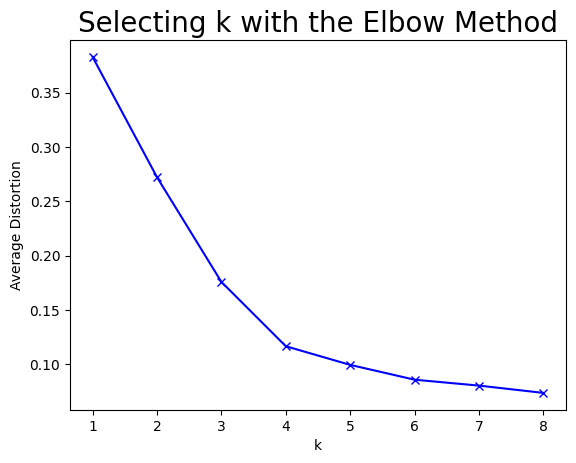

In [10]:
# Import necessary libraries
# from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(combined_avg_csv)
    prediction=model.predict(combined_avg_csv)
    distortion=sum(np.min(cdist(combined_avg_csv, model.cluster_centers_, 'euclidean'), axis=1)) / combined_avg_csv.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

K=4 seems to be the optimum value

In [11]:
# checking silhoutte score
from sklearn.metrics import silhouette_score
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((combined_avg_csv))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(combined_avg_csv, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7675091504759562)
For n_clusters = 3, silhouette score is 0.5527827869761458)
For n_clusters = 4, silhouette score is 0.5654000260147317)
For n_clusters = 5, silhouette score is 0.5715429807120052)
For n_clusters = 6, silhouette score is 0.5532410063219904)
For n_clusters = 7, silhouette score is 0.4919390895747573)
For n_clusters = 8, silhouette score is 0.4211091675732249)
For n_clusters = 9, silhouette score is 0.39436875648640646)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

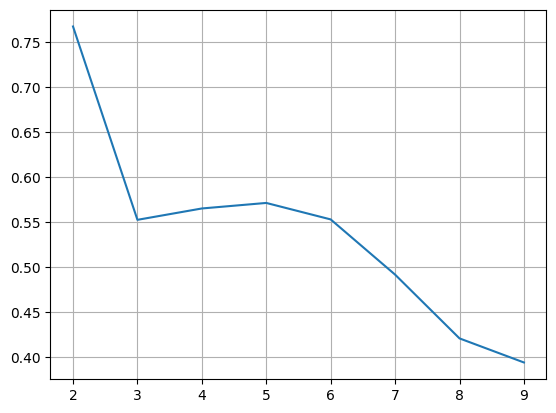

In [12]:
plt.plot(cluster_list,sil_score)
plt.grid()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


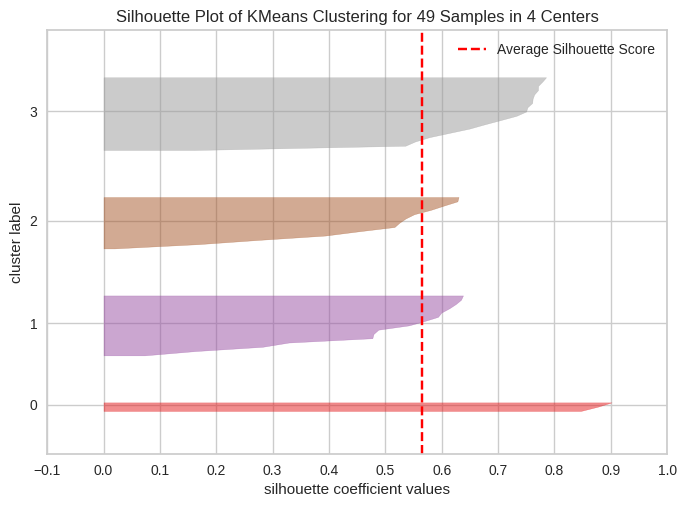

In [14]:
# Finding optimal no. of clusters with silhouette coefficients
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(combined_avg_csv)    
visualizer.show();

In [15]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(combined_avg_csv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [16]:
pickle.dump(kmeans, open("/content/drive/MyDrive/StockRecommendation.pkl", "wb"))

In [17]:
print(kmeans.labels_)
# [3 0 1 0 0 0 1 3 0 3 1 0 2 3 0 3 3 3 0 1 3 1 3 0 3 1 3 3 0 0 3 2 1 1 1 1 1
#  2 3 1 1 0 3 3 0 3 1 3 1]

[3 0 1 0 0 0 1 3 0 3 1 0 2 3 0 3 3 3 0 1 3 1 3 0 3 1 3 3 0 0 3 2 1 1 1 1 1
 2 3 1 1 0 3 3 0 3 1 3 1]


In [18]:
# df['K_means_segments'] = kmeans.labels_
combined_avg_csv['K_means_segments'] = kmeans.labels_

In [19]:
combined_avg_csv.head()

,Open,High,Low,Close,Volume,K_means_segments
0,0.027555,0.027912,0.027185,0.027517,0.280588,3
0,0.149956,0.150277,0.149802,0.150058,0.046415,0
0,0.060326,0.060730,0.059857,0.060308,0.431287,1
0,0.277906,0.278310,0.277628,0.277998,0.037009,0
0,0.355020,0.356537,0.353737,0.355094,0.019775,0


In [20]:
data = {0:[],1:[],2:[],3:[]}
index = 0
for label in combined_avg_csv['K_means_segments']:
  data[int(label)].append(list_csv[index])
  index = index+1
print(data)

{0: ['ASIANPAINT.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BRITANNIA.csv', 'DRREDDY.csv', 'GRASIM.csv', 'HEROMOTOCO.csv', 'INFY.csv', 'LT.csv', 'MARUTI.csv', 'TCS.csv', 'ULTRACEMCO.csv'], 1: ['AXISBANK.csv', 'BHARTIARTL.csv', 'COALINDIA.csv', 'HINDALCO.csv', 'ICICIBANK.csv', 'ITC.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'VEDL.csv', 'ZEEL.csv'], 2: ['EICHERMOT.csv', 'NESTLEIND.csv', 'SHREECEM.csv'], 3: ['ADANIPORTS.csv', 'BPCL.csv', 'CIPLA.csv', 'GAIL.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HINDUNILVR.csv', 'INDUSINDBK.csv', 'IOC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'MM.csv', 'SUNPHARMA.csv', 'TECHM.csv', 'TITAN.csv', 'UPL.csv', 'WIPRO.csv']}


In [21]:
print("Cluster 1 ;- ",data[0])
print("Cluster 2 ;- ",data[1])
print("Cluster 3 ;- ",data[2])
print("Cluster 4 ;- ",data[3])


Cluster 1 ;-  ['ASIANPAINT.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BRITANNIA.csv', 'DRREDDY.csv', 'GRASIM.csv', 'HEROMOTOCO.csv', 'INFY.csv', 'LT.csv', 'MARUTI.csv', 'TCS.csv', 'ULTRACEMCO.csv']
Cluster 2 ;-  ['AXISBANK.csv', 'BHARTIARTL.csv', 'COALINDIA.csv', 'HINDALCO.csv', 'ICICIBANK.csv', 'ITC.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'VEDL.csv', 'ZEEL.csv']
Cluster 3 ;-  ['EICHERMOT.csv', 'NESTLEIND.csv', 'SHREECEM.csv']
Cluster 4 ;-  ['ADANIPORTS.csv', 'BPCL.csv', 'CIPLA.csv', 'GAIL.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HINDUNILVR.csv', 'INDUSINDBK.csv', 'IOC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'MM.csv', 'SUNPHARMA.csv', 'TECHM.csv', 'TITAN.csv', 'UPL.csv', 'WIPRO.csv']


In [ ]:
# Cluster 1 ;-  ['ASIANPAINT.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BRITANNIA.csv', 'DRREDDY.csv', 'GRASIM.csv', 'HEROMOTOCO.csv', 'INFY.csv', 'LT.csv', 'MARUTI.csv', 'TCS.csv', 'ULTRACEMCO.csv']
# Cluster 2 ;-  ['AXISBANK.csv', 'BHARTIARTL.csv', 'COALINDIA.csv', 'HINDALCO.csv', 'ICICIBANK.csv', 'ITC.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'VEDL.csv', 'ZEEL.csv']
# Cluster 3 ;-  ['EICHERMOT.csv', 'NESTLEIND.csv', 'SHREECEM.csv']
# Cluster 4 ;-  ['ADANIPORTS.csv', 'BPCL.csv', 'CIPLA.csv', 'GAIL.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HINDUNILVR.csv', 'INDUSINDBK.csv', 'IOC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'MM.csv', 'SUNPHARMA.csv', 'TECHM.csv', 'TITAN.csv', 'UPL.csv', 'WIPRO.csv']